# Example DNN code

## Library Import

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from pandas import DataFrame as df
from sklearn.model_selection import train_test_split
from keras import backend as K

Using TensorFlow backend.


In [2]:
def check_correct(predict, y):
    result = {}
    result['True-Positive'] = 0
    result['False-Negative'] = 0
    result['True-Negative'] = 0
    result['False-Positive'] = 0

    for i in range(len(predict)) :
        if int(y[i])==1 :
            if int(predict[i]) == 1 :
                result['True-Positive'] += 1
            else :
                result['False-Negative'] += 1
        else :
            if int(predict[i]) == 0 :
                result['True-Negative'] += 1
            else :
                result['False-Positive'] += 1

    #for result_k, result_v in result.items():
    #    print(result_k +" : "+ str(result_v))
    sensitivity=result['True-Positive']/(result['True-Positive']+result['False-Negative'])
    specificity=result['True-Negative']/(result['True-Negative']+result['False-Positive'])
    #print("Sensitivity :", sensitivity)
    #print("Specificity :", specificity)
    return sensitivity, specificity

In [3]:
def custom_loss(y_true, y_pred):

    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)
    sen=tp/(tp+fn+K.epsilon())
    spe=tn/(tn+fp+K.epsilon())
    #p = tp / (tp + fp + K.epsilon())
    #r = tp / (tp + fn + K.epsilon())
    bal=(2*sen+spe)/(3+K.epsilon())
    bal = tf.where(tf.is_nan(bal), tf.zeros_like(bal), bal)
    #f1 = 2*p*r / (p+r+K.epsilon())
    #f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    print(tf.size(tp),tf.size(tn))
    return 1 - K.mean(bal)

### Data Loading

In [4]:
data = pd.read_csv("BDA_train_data.csv")
data_patient = data.patient.values

data

,patient,ABL1,BRAF,CHEK1,FANCC,GATA3,JAK2,MITF,PDCD1LG2,RBM10,...,RB1,STAT3,ETV4,TMPRSS2,ETV5,BCR,ETV1,ETV6,MYB,result
0,TCGA-DD-A1EF-01,-1.216,0.376,-0.533,0.489,0.628,1.266,0.413,0.306,0.775,...,0.175,-1.403,1.111,-2.099,-1.103,-1.216,-2.099,0.610,0.491,1
1,GSM157170,0.860,0.284,0.334,-0.556,-1.700,-0.580,-0.134,-1.283,0.767,...,1.359,1.021,0.922,-1.150,1.848,0.811,0.494,0.017,-0.127,1
2,TARGET-50-PAKSCC-01,-0.989,0.349,-0.274,-1.353,0.794,1.340,0.009,0.679,0.742,...,0.216,-0.290,0.544,-2.260,-0.884,0.383,-0.333,0.615,1.069,1
3,GSM241163,1.263,0.465,1.070,-0.086,-1.490,0.053,-1.748,-1.734,1.073,...,0.952,1.403,0.724,-0.499,0.703,1.119,0.096,-0.238,0.589,1
4,TCGA-EL-A3T3-01,-0.607,0.289,-0.062,-0.784,0.374,1.115,0.170,0.486,1.149,...,-0.075,-2.303,0.758,-2.303,-0.547,-0.137,-1.113,0.483,1.176,1
5,GSM722642,-0.788,0.451,0.960,-0.887,0.198,1.262,-0.065,-0.461,-0.865,...,0.425,-0.006,-0.283,-0.790,0.049,-0.560,-1.088,-0.214,-0.684,1
6,GSM118428,1.032,0.322,0.985,-0.473,-2.099,-1.335,-1.526,-1.908,0.897,...,1.443,1.483,1.551,-1.089,0.986,0.828,0.056,-0.111,-0.525,1
7,TCGA-IB-A6UG-01,0.110,0.334,-0.144,-1.279,0.389,1.060,0.172,0.247,0.969,...,-0.158,1.389,0.855,-2.595,-0.855,-0.820,-2.595,0.531,0.685,1
8,GSM270833,0.557,0.307,-0.690,-0.450,-0.147,0.670,-1.433,-1.455,0.989,...,0.838,1.785,-1.106,-1.757,-0.578,0.846,-0.581,0.502,0.233,1
9,GSM244282,1.016,-0.070,-0.161,-0.564,-2.061,-0.063,-1.306,-1.758,0.997,...,0.979,1.580,-0.435,1.090,-0.387,0.814,-0.375,-0.046,-0.350,1


In [5]:
test_data=pd.read_csv("BDA_test_data_.csv")

test_data

,patient,ABL1,BRAF,CHEK1,FANCC,GATA3,JAK2,MITF,PDCD1LG2,RBM10,...,PBRM1,RB1,STAT3,ETV4,TMPRSS2,ETV5,BCR,ETV1,ETV6,MYB
0,TCGA-BJ-A0Z0-01,-0.255,0.398,-0.897,-0.663,0.629,1.175,0.422,0.614,0.949,...,0.632,0.246,-2.117,0.745,-2.117,0.094,-1.431,-1.431,0.578,1.157
1,GSM461115,0.991,0.362,1.032,-0.552,1.941,-0.334,-0.924,-1.671,1.039,...,0.781,1.392,1.260,-0.734,-0.980,0.270,0.831,-0.247,-0.102,1.520
2,TCGA-BP-4335-01,-0.645,0.118,-0.811,0.758,0.479,1.092,0.041,0.305,1.087,...,-0.535,0.149,-1.306,0.777,-2.633,-0.473,-0.407,-0.263,0.419,1.058
3,GSM769804,0.311,-0.228,0.435,-0.289,-0.213,-0.243,0.640,-0.147,-0.275,...,0.581,1.392,0.512,0.206,-0.039,-0.066,1.624,-0.143,0.083,1.350
4,TCGA-VS-A954-01,-2.200,0.425,-0.738,-0.868,0.574,1.113,0.229,0.474,0.448,...,-0.286,-0.034,-2.200,0.913,-2.200,-1.492,-0.664,-2.200,0.347,0.971
5,TCGA-64-5781-01,-0.072,0.225,-0.534,-1.119,0.242,1.185,0.253,0.447,1.101,...,-0.587,-0.043,-1.315,0.681,-2.209,-0.958,-0.652,-0.286,0.823,0.537
6,TCGA-BP-4960-01,-1.362,0.253,-0.089,0.730,0.399,1.025,-0.061,0.337,1.158,...,-0.780,-0.004,-1.270,0.716,-2.495,-0.862,-0.438,-0.262,0.398,1.031
7,TCGA-AY-6196-01,-1.820,0.268,-0.315,-1.319,0.392,0.991,0.327,0.169,0.986,...,-0.518,0.049,-0.207,0.723,-2.603,-0.593,-0.645,-1.065,0.702,0.685
8,TCGA-BH-A0B9-01,-0.809,0.366,-0.654,-1.513,0.809,1.292,0.419,0.492,0.703,...,-0.722,0.066,-1.300,1.045,-2.483,-1.513,-0.365,-1.389,0.563,0.581
9,TCGA-BR-8365-01,-1.914,0.075,0.230,-1.124,0.454,0.905,0.142,0.083,0.796,...,-0.783,0.121,-0.712,0.632,-2.734,-0.373,-0.795,-1.095,0.677,0.748


## Process Train Data - for model training

In [6]:
x = data.drop(["patient","result"],axis=1).values
train_y = data.result.values

print("Information of Training Data")
print("Samples : {}".format(x.shape[0]))
print("Features : {}".format(x.shape[1]))

Information of Training Data


NameError: name 'x' is not defined

In [24]:
test_x = test_data.drop(["patient"],axis=1).values
#test_y = test_data.result.values
test_sample= test_data.patient.values
print("Information of Training Data")
print("Samples : {}".format(test_x.shape[0]))
print("Features : {}".format(test_x.shape[1]))

Information of Training Data
Samples : 6562
Features : 308


## Modeling & Training

In [25]:
# Set your layer nodes
layers=[200,100,50,20,10]

In [26]:
model = tf.keras.models.Sequential([
    
    # Layer 1
    # 노드 개수를 받고 이어나가는
    tf.keras.layers.Dense(layers[0], input_shape=(len(data.columns[1:-1]),),activation='relu'),
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate
    
    # Layer 2
    tf.keras.layers.Dense(layers[1], input_shape=(layers[0],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate
    
    # Layer 3
    tf.keras.layers.Dense(layers[2], input_shape=(layers[1],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate
    
    # Layer 4
    tf.keras.layers.Dense(layers[3], input_shape=(layers[2],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate
    
    # Layer 5
    tf.keras.layers.Dense(layers[4], input_shape=(layers[3],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate
    
    # Output Layer
    tf.keras.layers.Dense(1, input_shape=(layers[4],),activation='sigmoid'),
])

# Set your learning rate
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), # Change your learning rate
              loss=custom_loss, # "binary_crossentropy" ross를 줄이는 쪽으로 학습을 하는 바꿀수 있음
              metrics=['accuracy'])

Tensor("loss_2/dense_17_loss/Size:0", shape=(), dtype=int32) Tensor("loss_2/dense_17_loss/Size_1:0", shape=(), dtype=int32)


In [27]:
hist=model.fit(train_x, train_y, batch_size=10, epochs=50,validation_split=0.2) # change batch size, epochs, validation split rate

Train on 5248 samples, validate on 1313 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
5248/5248 [==============================] - 5s 920us/sample - loss: 0.4019 - acc: 0.6178 - val_loss: 0.8064 - val_acc: 0.5666
Epoch 2/50
5248/5248 [==============================] - 3s 594us/sample - loss: 0.2588 - acc: 0.7481 - val_loss: 0.7963 - val_acc: 0.6123
Epoch 3/50
5248/5248 [==============================] - 5s 931us/sample - loss: 0.1895 - acc: 0.8039 - val_loss: 0.7534 - val_acc: 0.7471
Epoch 4/50
5248/5248 [==============================] - 5s 1ms/sample - loss: 0.1683 - acc: 0.8255 - val_loss: 0.7311 - val_acc: 0.8142
Epoch 5/50
5248/5248 [==============================] - 3s 619us/sample - loss: 0.1529 - acc: 0.8312 - val_loss: 0.7215 - val_acc: 0.8408
Epoch 6/50
5248/5248 [==============================] - 3s 608us/sample - loss: 0.1381 - acc: 0.8430 - val_loss: 0.7323 - val_acc: 0.8035
Epoch 7/50
5248/5248 [==============================] - 3s 557us/sample - loss

## Training Visualization

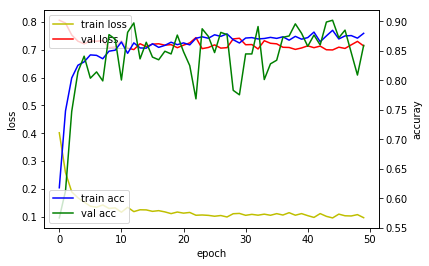

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_aixs = plt.subplots()

acc_aixs = loss_aixs.twinx()

loss_aixs.plot(hist.history['loss'], 'y', label='train loss')
loss_aixs.plot(hist.history['val_loss'], 'r', label='val loss')

acc_aixs.plot(hist.history['acc'], 'b', label='train acc')
acc_aixs.plot(hist.history['val_acc'], 'g', label='val acc')

loss_aixs.set_xlabel('epoch')
loss_aixs.set_ylabel('loss')
acc_aixs.set_ylabel('accuray')

loss_aixs.legend(loc='upper left')
acc_aixs.legend(loc='lower left')

plt.show()

## Model Evaluation

In [29]:
#Train performance
model.evaluate(train_x, train_y)

6561/6561 [==============================] - 0s 76us/sample - loss: 0.5308 - acc: 0.9130


[0.5308336265620217, 0.9129706]

In [30]:
# Validation performance
model.evaluate(val_x, val_y)

NameError: name 'val_x' is not defined

In [31]:
# Test prediction using DNN model
test_h = model.predict(test_x)
test_p = (test_h > 0.5).astype(int).flatten()

In [ ]:
#pd.concat([df(test_h),df(test_p)])

In [ ]:
#df(test_h).sort_values([0],acending)

In [32]:
df_test_pred=df(test_p)

In [33]:
test_result=pd.concat([df(test_sample),df_test_pred],axis=1)

In [34]:
test_result.columns=['patient','result']

In [36]:
test_result.to_csv("test_result.csv",index=False)